In [1]:
#importing necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSC40038 Data/Python/ORG02-24112017-25012023.csv') #reading the csv file

In [3]:
df.head()

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
0,University of London International Programmes ...,06/03/2018 00:00,NaN,B452158,A502856,2,True,27,12445,Attending,Graduand,PM Ceremony,26/10/2017 10:12,249
1,University of London International Programmes ...,06/03/2018 00:00,NaN,B452158,A502857,2,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:12,249
2,University of London International Programmes ...,06/03/2018 00:00,NaN,B452162,A502861,3,True,0,12445,Attending,Graduand,PM Ceremony,26/10/2017 10:16,249
3,University of London International Programmes ...,06/03/2018 00:00,NaN,B452162,A502862,3,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:16,249
4,University of London International Programmes ...,06/03/2018 00:00,NaN,B452162,A502863,3,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:16,249


In [4]:
df.isnull().sum()

EventName                0
StartDate                0
EventType            19448
BookingReference         0
AttendeeReference        0
GroupSize                0
IsLeadAttendee           0
AttendeeGrossCost        0
EventId                  0
BookingStatus            0
AttendeeType             0
TicketType               0
StatusCreatedDate        0
ClientId                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19448 entries, 0 to 19447
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventName          19448 non-null  object 
 1   StartDate          19448 non-null  object 
 2   EventType          0 non-null      float64
 3   BookingReference   19448 non-null  object 
 4   AttendeeReference  19448 non-null  object 
 5   GroupSize          19448 non-null  int64  
 6   IsLeadAttendee     19448 non-null  bool   
 7   AttendeeGrossCost  19448 non-null  int64  
 8   EventId            19448 non-null  int64  
 9   BookingStatus      19448 non-null  object 
 10  AttendeeType       19448 non-null  object 
 11  TicketType         19448 non-null  object 
 12  StatusCreatedDate  19448 non-null  object 
 13  ClientId           19448 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(8)
memory usage: 1.9+ MB


# Data cleaning

In [6]:
# df.fillna(method='ffill', inplace=True)

In [7]:
df.drop(axis=1, columns='EventType', inplace=True)

In [8]:
df.nunique()


EventName               12
StartDate                8
BookingReference      8198
AttendeeReference    19448
GroupSize               14
IsLeadAttendee           2
AttendeeGrossCost       16
EventId                 12
BookingStatus            3
AttendeeType             8
TicketType              25
StatusCreatedDate     8811
ClientId                 1
dtype: int64

In [9]:
df.duplicated().sum()


0

In [10]:
# df.drop_duplicates(inplace=True)
unique_cols= ['BookingStatus','IsLeadAttendee','StartDate','AttendeeType','TicketType', 'EventName'  ]

In [11]:
for i in unique_cols:
  print(i, 'unique columns are' ,df[i].unique())

BookingStatus unique columns are ['Attending' 'Cancelled' 'Waiting List']
IsLeadAttendee unique columns are [ True False]
StartDate unique columns are ['06/03/2018 00:00' '04/07/2019 00:00' '14/09/2018 10:00'
 '27/09/2018 00:00' '19/12/2019 09:30' '03/03/2022 00:00'
 '09/12/2021 00:00' '13/07/2022 00:00']
AttendeeType unique columns are ['Graduand' 'Guest' 'Child' 'Attendee' 'Procession' 'Academic'
 ' Graduand Waiting List' 'Teaching Centre Staff']
TicketType unique columns are ['PM Ceremony ' 'Guest PM Ceremony' 'AM Ceremony' 'Guest AM Ceremony'
 'Child (PM ceremony)' 'Child (AM ceremony)' 'Evening dinner '
 '121 Session' 'Standard' '14:30 Ceremony' 'Guest 14:30 Ceremony'
 '17:00 Ceremony' 'Guest 17:00 Ceremony' '11:00 Ceremony'
 'Guest 11:00 Ceremony' '13th Ceremony' '15th Ceremony'
 'Guest 15th Ceremony' '14th Ceremony' 'Guest 14th Ceremony'
 'Guest 13th Ceremony' '3 day ticket am/pm' 'Academic Ticket' 'Any day'
 'Teaching Centre Staff']
EventName unique columns are ['University of 

In [12]:
df.groupby('StartDate').sum().head()

,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,ClientId
StartDate,,,,,
03/03/2022 00:00,14128,1577,122730,84181282,1051527
04/07/2019 00:00,15556,1684,183219,77889312,1176276
06/03/2018 00:00,12119,1336,148384,46631415,933003
09/12/2021 00:00,1350,121,6050,9737672,96114
13/07/2022 00:00,12515,3432,57125,164279356,1573680


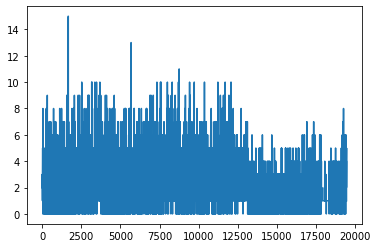

In [13]:
df['GroupSize'].plot()

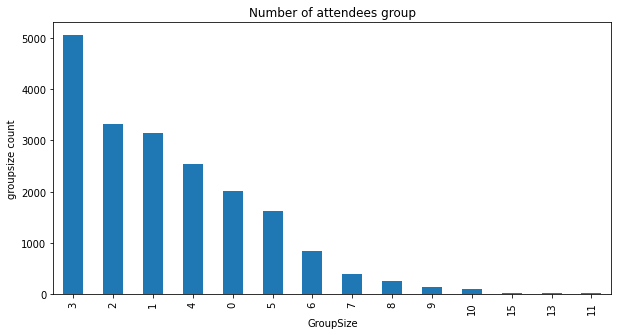

In [14]:
df.GroupSize.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of attendees group")
plt.ylabel('groupsize count')
plt.xlabel('GroupSize');

In [15]:
# fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(df['GroupSize'], )
# ax.set_xlabel('HP')
# ax.set_ylabel('Price')
# plt.show()

# Preprocessing

In [16]:
df2 = df.copy()

In [17]:
unique_column= ['BookingStatus','IsLeadAttendee','AttendeeType','TicketType', 'EventName'  ]

In [18]:
from sklearn import preprocessing
encode = preprocessing.LabelEncoder()
for i in unique_column:
  df2[i] = encode.fit_transform(df2[i])
df.head()

,EventName,StartDate,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
0,University of London International Programmes ...,06/03/2018 00:00,B452158,A502856,2,True,27,12445,Attending,Graduand,PM Ceremony,26/10/2017 10:12,249
1,University of London International Programmes ...,06/03/2018 00:00,B452158,A502857,2,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:12,249
2,University of London International Programmes ...,06/03/2018 00:00,B452162,A502861,3,True,0,12445,Attending,Graduand,PM Ceremony,26/10/2017 10:16,249
3,University of London International Programmes ...,06/03/2018 00:00,B452162,A502862,3,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:16,249
4,University of London International Programmes ...,06/03/2018 00:00,B452162,A502863,3,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:16,249


In [19]:
df2.head()

,EventName,StartDate,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
0,11,06/03/2018 00:00,B452158,A502856,2,1,27,12445,0,4,22,26/10/2017 10:12,249
1,11,06/03/2018 00:00,B452158,A502857,2,0,50,12445,0,5,21,26/10/2017 10:12,249
2,11,06/03/2018 00:00,B452162,A502861,3,1,0,12445,0,4,22,26/10/2017 10:16,249
3,11,06/03/2018 00:00,B452162,A502862,3,0,50,12445,0,5,21,26/10/2017 10:16,249
4,11,06/03/2018 00:00,B452162,A502863,3,0,50,12445,0,5,21,26/10/2017 10:16,249


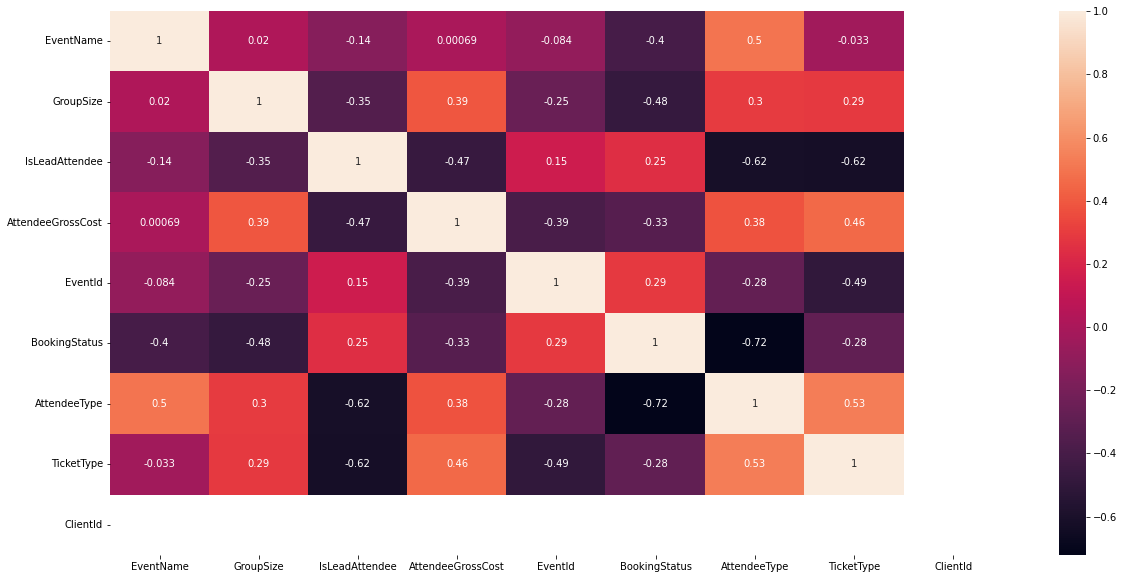

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), annot = True)

In [21]:
df2['StartDate'] = pd.to_datetime(df2['StartDate'], infer_datetime_format=True)

In [22]:
df2['StatusCreatedDate'] = pd.to_datetime(df2['StatusCreatedDate'], infer_datetime_format=True)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19448 entries, 0 to 19447
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   EventName          19448 non-null  int64         
 1   StartDate          19448 non-null  datetime64[ns]
 2   BookingReference   19448 non-null  object        
 3   AttendeeReference  19448 non-null  object        
 4   GroupSize          19448 non-null  int64         
 5   IsLeadAttendee     19448 non-null  int64         
 6   AttendeeGrossCost  19448 non-null  int64         
 7   EventId            19448 non-null  int64         
 8   BookingStatus      19448 non-null  int64         
 9   AttendeeType       19448 non-null  int64         
 10  TicketType         19448 non-null  int64         
 11  StatusCreatedDate  19448 non-null  datetime64[ns]
 12  ClientId           19448 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 1.9+ 

In [24]:
df2.describe()

,EventName,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,ClientId
count,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.0
mean,7.523447,2.864870,0.421534,26.712155,19720.783680,0.214624,4.306458,15.551831,249.0
std,2.937263,1.985768,0.493817,32.696315,5114.849647,0.529005,1.188889,6.732524,0.0
min,0.000000,0.000000,0.000000,-25.000000,12445.000000,0.000000,0.000000,0.000000,249.0
25%,5.000000,1.000000,0.000000,0.000000,16488.000000,0.000000,4.000000,8.000000,249.0
50%,6.000000,3.000000,0.000000,25.000000,19934.000000,0.000000,5.000000,20.000000,249.0
75%,10.000000,4.000000,1.000000,50.000000,25956.000000,0.000000,5.000000,21.000000,249.0
max,11.000000,15.000000,1.000000,995.000000,26165.000000,2.000000,7.000000,24.000000,249.0


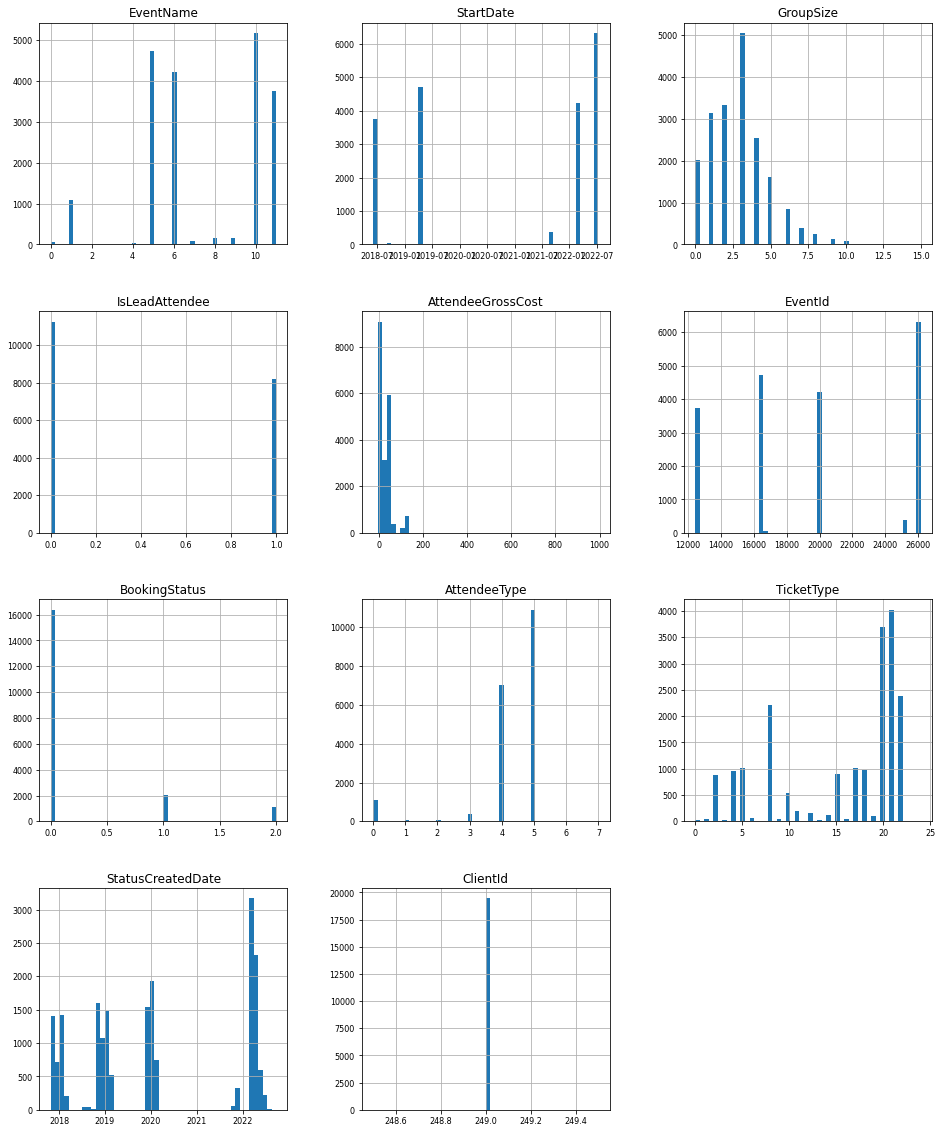

In [25]:
df2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

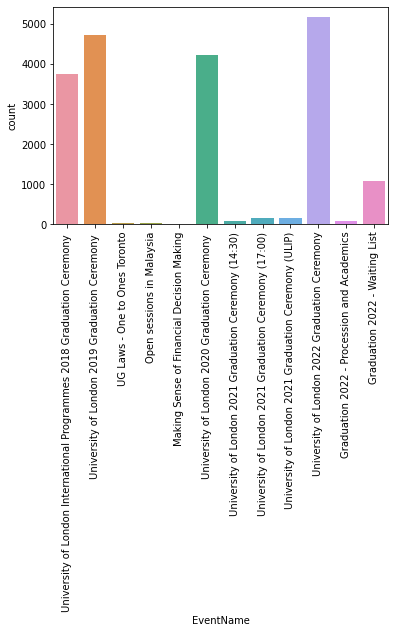

In [26]:
sns.countplot(x='EventName', data=df);
plt.xticks(rotation=90);

In [27]:
# plt.figure(figsize=(16,5), dpi=100)
# plt.plot(df['EventName'],  color='tab:red')
# plt.gca().set(title='title')
# plt.xticks(rotation=90)
# plt.show()

# sns.pairplot(df, hue='StartDate');

In [28]:
# import matplotlib.pyplot as plt
# def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
#     plt.figure(figsize=(16,5), dpi=dpi)
#     plt.plot(x, y, color='tab:red')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.xticks(rotation=90)
#     plt.show()


# for i in unique_column:
#     plot_df(df, x=df2.index, y=df2[i], title=i)

In [29]:
df3 = df2.copy()

In [30]:
df3

,EventName,StartDate,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
0,11,2018-06-03,B452158,A502856,2,1,27,12445,0,4,22,2017-10-26 10:12:00,249
1,11,2018-06-03,B452158,A502857,2,0,50,12445,0,5,21,2017-10-26 10:12:00,249
2,11,2018-06-03,B452162,A502861,3,1,0,12445,0,4,22,2017-10-26 10:16:00,249
3,11,2018-06-03,B452162,A502862,3,0,50,12445,0,5,21,2017-10-26 10:16:00,249
4,11,2018-06-03,B452162,A502863,3,0,50,12445,0,5,21,2017-10-26 10:16:00,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19443,10,2022-07-13,B1075279,A1178687,5,0,25,25956,0,5,18,2022-07-14 13:49:00,249
19444,10,2022-07-13,B1071435,A1178755,4,0,25,25956,0,5,17,2022-07-15 11:10:00,249
19445,10,2022-07-13,B1071435,A1178756,4,0,25,25956,0,5,17,2022-07-15 11:10:00,249
19446,10,2022-07-13,B1071435,A1178757,4,0,25,25956,0,5,17,2022-07-15 11:10:00,249


>> Getting days to event 

In [31]:
df3['time_to_event'] = pd.DatetimeIndex(df['StartDate']) - pd.DatetimeIndex(df['StatusCreatedDate'])

In [32]:
df3['days_to_event'] = df3['time_to_event']/ np.timedelta64(1, 'D')

In [33]:
df3.head()

,EventName,StartDate,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,time_to_event,days_to_event
0,11,2018-06-03,B452158,A502856,2,1,27,12445,0,4,22,2017-10-26 10:12:00,249,219 days 13:48:00,219.575000
1,11,2018-06-03,B452158,A502857,2,0,50,12445,0,5,21,2017-10-26 10:12:00,249,219 days 13:48:00,219.575000
2,11,2018-06-03,B452162,A502861,3,1,0,12445,0,4,22,2017-10-26 10:16:00,249,219 days 13:44:00,219.572222
3,11,2018-06-03,B452162,A502862,3,0,50,12445,0,5,21,2017-10-26 10:16:00,249,219 days 13:44:00,219.572222
4,11,2018-06-03,B452162,A502863,3,0,50,12445,0,5,21,2017-10-26 10:16:00,249,219 days 13:44:00,219.572222


In [34]:
# sort dataframe by start date
df3 = df3.sort_values(by='StartDate') 

In [35]:
# setting dataframe index to start date for better analysis
df3 = df3.set_index('StartDate')

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19448 entries, 2018-06-03 00:00:00 to 2022-07-13 00:00:00
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   EventName          19448 non-null  int64          
 1   BookingReference   19448 non-null  object         
 2   AttendeeReference  19448 non-null  object         
 3   GroupSize          19448 non-null  int64          
 4   IsLeadAttendee     19448 non-null  int64          
 5   AttendeeGrossCost  19448 non-null  int64          
 6   EventId            19448 non-null  int64          
 7   BookingStatus      19448 non-null  int64          
 8   AttendeeType       19448 non-null  int64          
 9   TicketType         19448 non-null  int64          
 10  StatusCreatedDate  19448 non-null  datetime64[ns] 
 11  ClientId           19448 non-null  int64          
 12  time_to_event      19448 non-null  timedelta64[ns]
 13  days_to_eve

In [37]:
# dropping negative values
df3_new = df3.drop(df3[df3['days_to_event'] < 0].index, )
df3_new.info()
# inplace = True

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4225 entries, 2019-12-19 09:30:00 to 2022-03-03 00:00:00
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   EventName          4225 non-null   int64          
 1   BookingReference   4225 non-null   object         
 2   AttendeeReference  4225 non-null   object         
 3   GroupSize          4225 non-null   int64          
 4   IsLeadAttendee     4225 non-null   int64          
 5   AttendeeGrossCost  4225 non-null   int64          
 6   EventId            4225 non-null   int64          
 7   BookingStatus      4225 non-null   int64          
 8   AttendeeType       4225 non-null   int64          
 9   TicketType         4225 non-null   int64          
 10  StatusCreatedDate  4225 non-null   datetime64[ns] 
 11  ClientId           4225 non-null   int64          
 12  time_to_event      4225 non-null   timedelta64[ns]
 13  days_to_even

In [38]:
# viewing columns with negative values
df3[df3['days_to_event'] < 0]
# ['EventName'].unique()

,EventName,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,time_to_event,days_to_event
StartDate,,,,,,,,,,,,,,
2018-06-03,11,B483465,A536494,3,1,0,12445,0,4,8,2018-01-11 15:51:00,249,-152 days +08:09:00,-151.660417
2018-06-03,11,B483465,A536495,3,0,50,12445,0,5,20,2018-01-11 15:51:00,249,-152 days +08:09:00,-151.660417
2018-06-03,11,B483465,A536496,3,0,50,12445,0,5,20,2018-01-11 15:51:00,249,-152 days +08:09:00,-151.660417
2018-06-03,11,B482984,A536503,3,0,0,12445,0,3,12,2018-01-11 16:04:00,249,-152 days +07:56:00,-151.669444
2018-06-03,11,B483480,A536512,2,1,75,12445,0,4,8,2018-01-11 16:12:00,249,-152 days +07:48:00,-151.675000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-13,10,B1068087,A1137136,3,0,25,25956,0,5,18,2022-03-10 23:26:00,249,-83 days +00:34:00,-82.976389
2022-07-13,10,B1068087,A1137135,3,0,25,25956,0,5,18,2022-03-10 23:26:00,249,-83 days +00:34:00,-82.976389
2022-07-13,10,B1068087,A1137134,3,1,0,25956,0,4,5,2022-03-10 23:26:00,249,-83 days +00:34:00,-82.976389


>>>> decoding encoded values

In [39]:
# decoding encoded labels from dataframe
olddf = pd.DataFrame(df['EventName'])
decode = pd.DataFrame(olddf['EventName'].unique())



In [40]:
# newdf = pd.DataFrame(df4['EventName'])
# newdf 
decoded = pd.DataFrame(df2['EventName'].unique())
ref_df = pd.DataFrame()
ref_df['decode']=decode
ref_df['decoded']=decoded
ref_df

,decode,decoded
0,University of London International Programmes ...,11
1,University of London 2019 Graduation Ceremony,5
2,UG Laws - One to Ones Toronto,4
3,Open sessions in Malaysia,3
4,Making Sense of Financial Decision Making,2
5,University of London 2020 Graduation Ceremony,6
6,University of London 2021 Graduation Ceremony ...,7
7,University of London 2021 Graduation Ceremony ...,8
8,University of London 2021 Graduation Ceremony ...,9
9,University of London 2022 Graduation Ceremony,10


## Groupby section

In [41]:
df4 = df3.resample('w').sum()

In [42]:
df4

,EventName,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,ClientId,days_to_event
StartDate,,,,,,,,,,
2018-06-03,41217,12119,1336,148384,46631415,371,17197,68220,933003,606164.106250
2018-06-10,0,0,0,0,0,0,0,0,0,0.000000
2018-06-17,0,0,0,0,0,0,0,0,0,0.000000
2018-06-24,0,0,0,0,0,0,0,0,0,0.000000
2018-07-01,0,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
2022-06-19,0,0,0,0,0,0,0,0,0,0.000000
2022-06-26,0,0,0,0,0,0,0,0,0,0.000000
2022-07-03,0,0,0,0,0,0,0,0,0,0.000000


In [43]:
# df3_new['cum_booking'] = df3_new['GroupSize'].cumsum(axis=0)

In [44]:
# df3_new['cum_booking'].plot()

In [45]:
# df3_new.GroupSize.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
# plt.title("Number of attendees group")
# plt.ylabel('groupsize count')
# plt.xlabel('GroupSize');

In [46]:
df3_new.describe()

,EventName,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,ClientId,time_to_event,days_to_event
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.0,4225,4225.000000
mean,5.998107,3.344379,0.373728,29.519527,19934.700118,0.060118,4.584379,18.372781,249.0,772 days 03:23:54.362130176,772.141601
std,0.087018,2.063385,0.483850,31.775843,32.174989,0.237734,0.535255,5.084976,0.0,130 days 11:39:33.228417814,130.485801
min,2.000000,0.000000,0.000000,0.000000,19934.000000,0.000000,2.000000,8.000000,249.0,7 days 20:16:00,7.844444
25%,6.000000,2.000000,0.000000,0.000000,19934.000000,0.000000,4.000000,20.000000,249.0,700 days 20:31:00,700.854861
50%,6.000000,3.000000,0.000000,50.000000,19934.000000,0.000000,5.000000,21.000000,249.0,775 days 15:43:00,775.654861
75%,6.000000,4.000000,1.000000,50.000000,19934.000000,0.000000,5.000000,21.000000,249.0,809 days 18:22:00,809.765278
max,6.000000,11.000000,1.000000,995.000000,21413.000000,1.000000,5.000000,23.000000,249.0,1086 days 12:31:00,1086.521528


# seasonality check

In [47]:
df3_new.head()
# 'EventName', 'GroupSize'

,EventName,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,time_to_event,days_to_event
StartDate,,,,,,,,,,,,,,
2019-12-19 09:30:00,2,B787286,A851402,1,1,995,21413,0,2,23,2019-11-12 13:14:00,249,7 days 20:16:00,7.844444
2019-12-19 09:30:00,2,B790602,A854870,1,1,995,21413,0,2,23,2019-11-17 20:09:00,249,31 days 13:21:00,31.556250
2022-03-03 00:00:00,6,B805874,A872216,2,1,0,19934,0,4,22,2020-01-19 13:04:00,249,773 days 10:56:00,773.455556
2022-03-03 00:00:00,6,B805929,A872276,5,0,50,19934,0,5,21,2020-01-19 17:24:00,249,773 days 06:36:00,773.275000
2022-03-03 00:00:00,6,B805929,A872275,5,0,50,19934,0,5,21,2020-01-19 17:24:00,249,773 days 06:36:00,773.275000


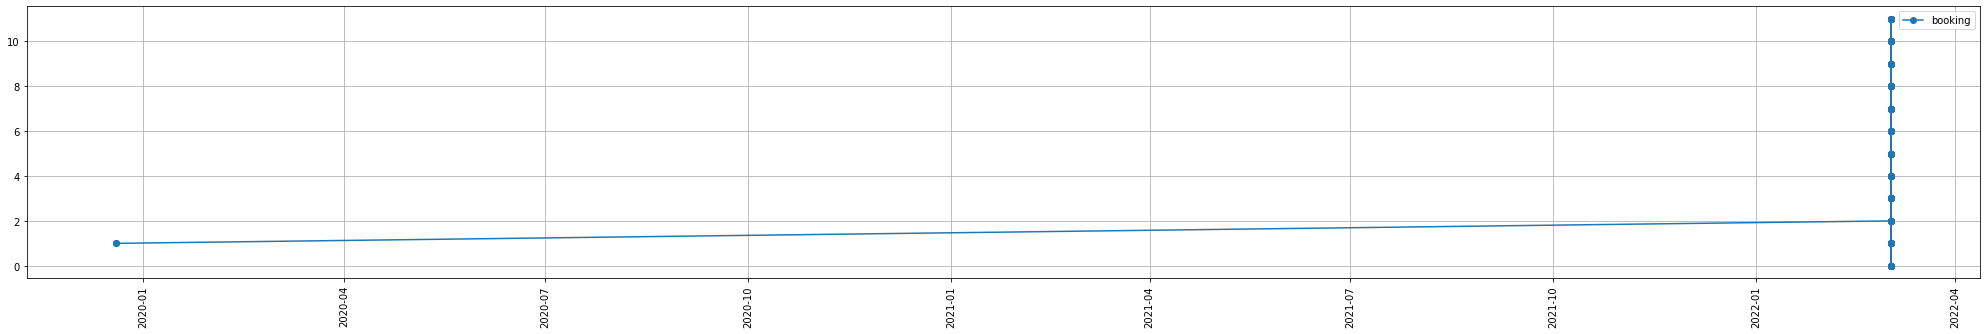

In [48]:
# Ploting the curve 
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(df3_new['GroupSize'], marker='o', label='booking')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [49]:
# Ploting the curve 
# plt.figure(figsize=(35,5))
# plt.grid()
# plt.plot(df3_new['cum_booking'], marker='o', label='booking')
# plt.xticks(rotation=90)
# plt.legend()
# plt.show()

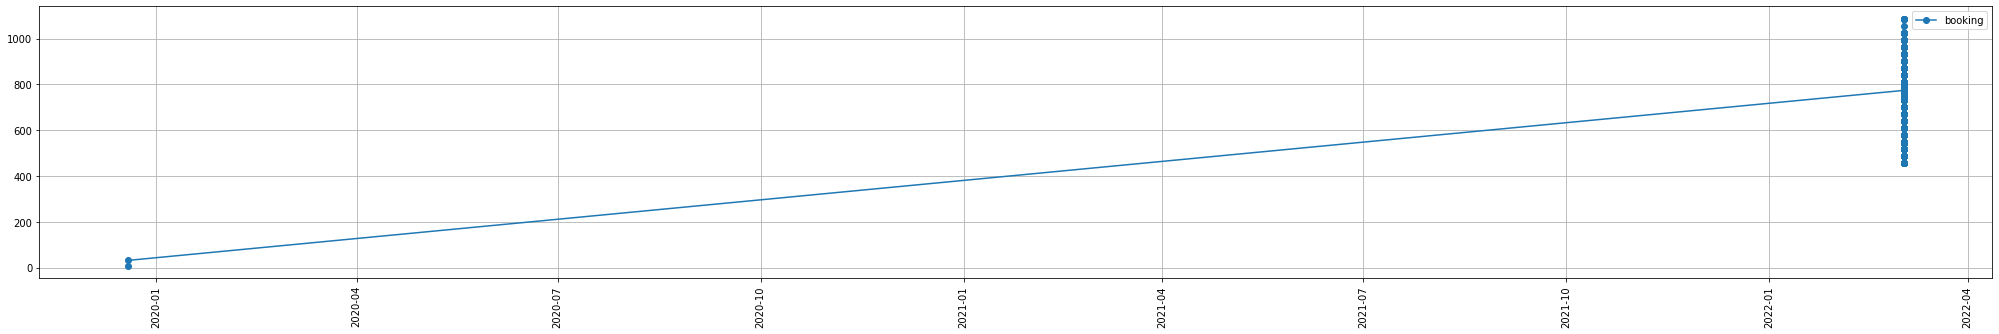

In [50]:
# Ploting the curve 
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(df3_new['days_to_event'], marker='o', label='booking')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [51]:
dfs = df3_new.reset_index().set_index('StatusCreatedDate').sort_index(axis=0)
dfs

,StartDate,EventName,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,ClientId,time_to_event,days_to_event
StatusCreatedDate,,,,,,,,,,,,,,
2019-11-12 13:14:00,2019-12-19 09:30:00,2,B787286,A851402,1,1,995,21413,0,2,23,249,7 days 20:16:00,7.844444
2019-11-17 20:09:00,2019-12-19 09:30:00,2,B790602,A854870,1,1,995,21413,0,2,23,249,31 days 13:21:00,31.556250
2019-12-03 11:29:00,2022-03-03 00:00:00,6,B795637,A860012,5,0,50,19934,0,5,20,249,1086 days 12:31:00,1086.521528
2019-12-03 11:29:00,2022-03-03 00:00:00,6,B795637,A860010,5,0,50,19934,0,5,20,249,1086 days 12:31:00,1086.521528
2019-12-03 11:29:00,2022-03-03 00:00:00,6,B795637,A860009,5,0,50,19934,0,5,20,249,1086 days 12:31:00,1086.521528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-17 08:36:00,2022-03-03 00:00:00,6,B820837,A888322,3,0,50,19934,0,5,20,249,744 days 15:24:00,744.641667
2020-02-17 08:36:00,2022-03-03 00:00:00,6,B820837,A888323,3,0,50,19934,0,5,20,249,744 days 15:24:00,744.641667
2020-02-17 08:39:00,2022-03-03 00:00:00,6,B820839,A888325,2,1,0,19934,0,4,8,249,744 days 15:21:00,744.639583


In [52]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4225 entries, 2019-11-12 13:14:00 to 2020-02-17 10:34:00
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   StartDate          4225 non-null   datetime64[ns] 
 1   EventName          4225 non-null   int64          
 2   BookingReference   4225 non-null   object         
 3   AttendeeReference  4225 non-null   object         
 4   GroupSize          4225 non-null   int64          
 5   IsLeadAttendee     4225 non-null   int64          
 6   AttendeeGrossCost  4225 non-null   int64          
 7   EventId            4225 non-null   int64          
 8   BookingStatus      4225 non-null   int64          
 9   AttendeeType       4225 non-null   int64          
 10  TicketType         4225 non-null   int64          
 11  ClientId           4225 non-null   int64          
 12  time_to_event      4225 non-null   timedelta64[ns]
 13  days_to_even

## new cummulative column

In [53]:
dfs['cum_booking'] = dfs['GroupSize'].cumsum(axis=0)

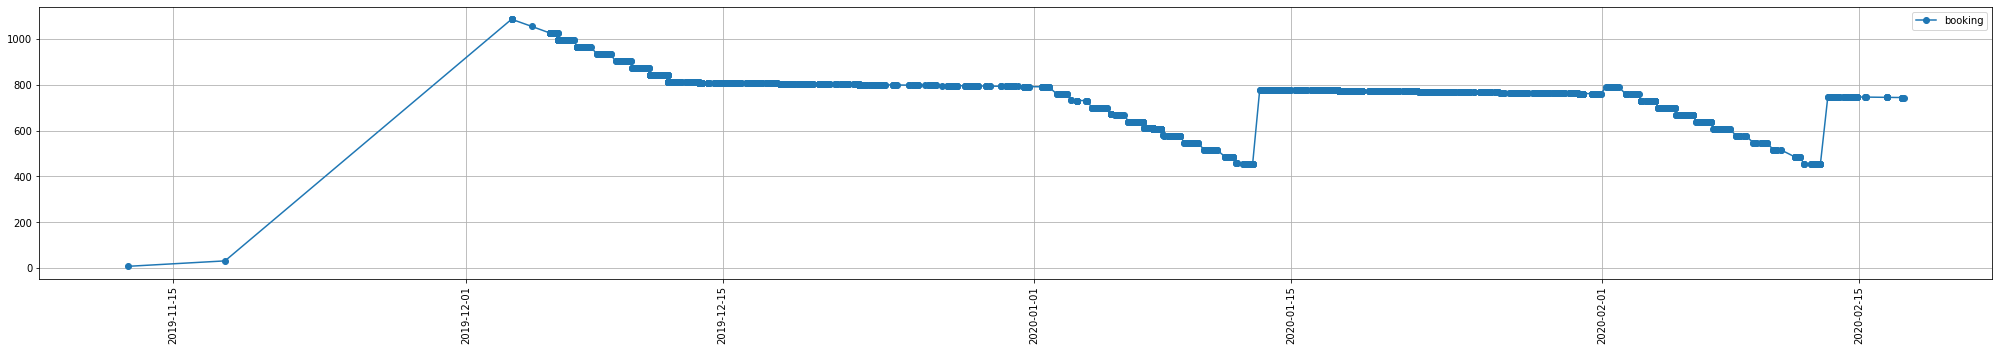

In [54]:
# Ploting the curve 
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(dfs['days_to_event'], marker='o', label='booking')
plt.xticks(rotation=90)
plt.legend()
plt.show()

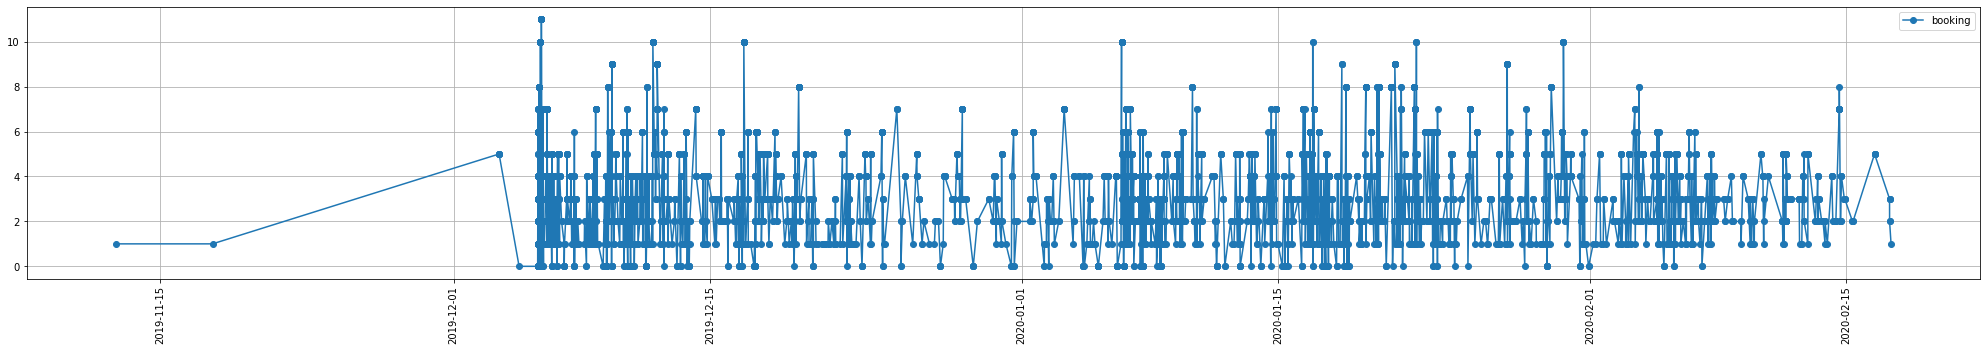

In [55]:
# Ploting the curve 
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(dfs['GroupSize'], marker='o', label='booking')
plt.xticks(rotation=90)
plt.legend()
plt.show()

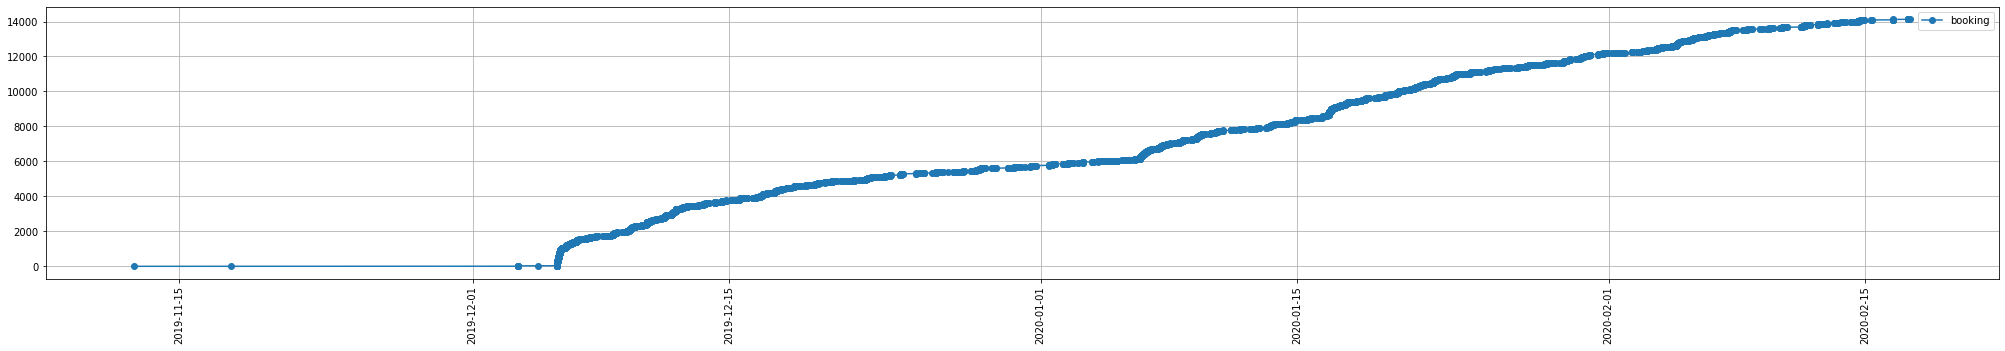

In [56]:
# Ploting the curve 
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(dfs['cum_booking'], marker='o', label='booking')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [57]:
# Ploting the curve 
# plt.figure(figsize=(35,5))
# plt.grid()
# dfs['cum_booking'].plot.bar()
# plt.plot(dfs['cum_booking'], marker='o', label='booking')
# plt.xticks(rotation=90)
# plt.legend()
# plt.show()

In [58]:
dfs['StartDate'].unique()

array(['2019-12-19T09:30:00.000000000', '2022-03-03T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [59]:
dfs['EventName'].unique()

array([2, 6])

In [60]:
dfe = dfs.resample('w').sum()
dfe

,EventName,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,ClientId,days_to_event,cum_booking
StatusCreatedDate,,,,,,,,,,,
2019-11-17,4,2,2,1990,42826,0,4,46,498,39.400694,3
2019-11-24,0,0,0,0,0,0,0,0,0,0.000000,0
2019-12-01,0,0,0,0,0,0,0,0,0,0.000000,0
2019-12-08,3414,1934,223,15923,11342446,45,2622,10653,141681,568383.778472,584637
2019-12-15,3408,1977,208,16172,11322512,43,2604,10512,141432,480680.117361,1661992
2019-12-22,2154,1171,141,10290,7156306,20,1652,6895,89391,288954.129861,1625223
2019-12-29,966,532,56,4920,3209374,16,749,2998,40089,128443.878472,862184
2020-01-05,1020,485,64,4381,3388780,24,778,3183,42330,126617.448611,1000254
2020-01-12,3348,1830,206,16595,11123172,44,2578,10621,138942,322396.598611,3933754


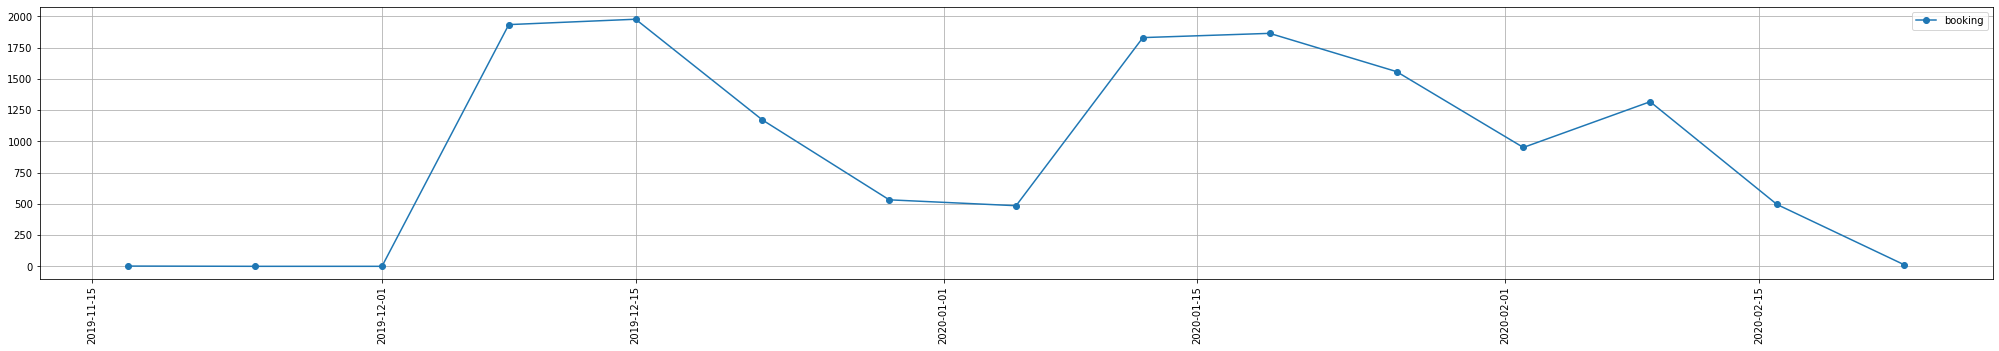

In [61]:
# Ploting the curve 
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(dfe['GroupSize'], marker='o', label='booking')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Feature selection
getting column for prediction

In [62]:

dfs

,StartDate,EventName,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,ClientId,time_to_event,days_to_event,cum_booking
StatusCreatedDate,,,,,,,,,,,,,,,
2019-11-12 13:14:00,2019-12-19 09:30:00,2,B787286,A851402,1,1,995,21413,0,2,23,249,7 days 20:16:00,7.844444,1
2019-11-17 20:09:00,2019-12-19 09:30:00,2,B790602,A854870,1,1,995,21413,0,2,23,249,31 days 13:21:00,31.556250,2
2019-12-03 11:29:00,2022-03-03 00:00:00,6,B795637,A860012,5,0,50,19934,0,5,20,249,1086 days 12:31:00,1086.521528,7
2019-12-03 11:29:00,2022-03-03 00:00:00,6,B795637,A860010,5,0,50,19934,0,5,20,249,1086 days 12:31:00,1086.521528,12
2019-12-03 11:29:00,2022-03-03 00:00:00,6,B795637,A860009,5,0,50,19934,0,5,20,249,1086 days 12:31:00,1086.521528,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-17 08:36:00,2022-03-03 00:00:00,6,B820837,A888322,3,0,50,19934,0,5,20,249,744 days 15:24:00,744.641667,14122
2020-02-17 08:36:00,2022-03-03 00:00:00,6,B820837,A888323,3,0,50,19934,0,5,20,249,744 days 15:24:00,744.641667,14125
2020-02-17 08:39:00,2022-03-03 00:00:00,6,B820839,A888325,2,1,0,19934,0,4,8,249,744 days 15:21:00,744.639583,14127


In [63]:
dfPred = dfe[['EventName', 'GroupSize']]
dfPred

,EventName,GroupSize
StatusCreatedDate,,
2019-11-17,4,2
2019-11-24,0,0
2019-12-01,0,0
2019-12-08,3414,1934
2019-12-15,3408,1977
2019-12-22,2154,1171
2019-12-29,966,532
2020-01-05,1020,485
2020-01-12,3348,1830


In [64]:
dfs.columns

Index(['StartDate', 'EventName', 'BookingReference', 'AttendeeReference',
       'GroupSize', 'IsLeadAttendee', 'AttendeeGrossCost', 'EventId',
       'BookingStatus', 'AttendeeType', 'TicketType', 'ClientId',
       'time_to_event', 'days_to_event', 'cum_booking'],
      dtype='object')

## checking for stationarity

In [65]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [66]:
# ADF Test on each column
for name, column in dfPred.iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "EventName" 
    -----------------------------------------------
ADF Statistic: -3.124782
p-value: 0.024773
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702
Non-stationary


    Augmented Dickey-Fuller Test on "GroupSize" 
    -----------------------------------------------
ADF Statistic: -3.117128
p-value: 0.025311
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702
Non-stationary




# Predictions

## Prediction using Arima

In [67]:

!pip install pmdarima



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dfs['GroupSize'], test_size=.3, shuffle=False)

In [86]:
train

StatusCreatedDate
2019-11-12 13:14:00    1
2019-11-17 20:09:00    1
2019-12-03 11:29:00    5
2019-12-03 11:29:00    5
2019-12-03 11:29:00    5
                      ..
2020-01-19 18:39:00    8
2020-01-19 18:39:00    8
2020-01-19 18:39:00    8
2020-01-19 18:39:00    8
2020-01-19 18:39:00    8
Name: GroupSize, Length: 2957, dtype: int64

In [87]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(dfs['GroupSize'], trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=15194.746, Time=8.88 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=18113.771, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15195.375, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=16163.898, Time=1.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23556.082, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=15195.426, Time=1.68 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=15192.934, Time=5.96 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=15196.092, Time=0.92 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=15195.996, Time=0.90 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=15194.682, Time=9.86 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=15195.038, Time=1.11 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=15196.526, Time=11.79 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=3.57 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 47.081 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4225
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -7591.467
Date:                Sun, 19 Feb 2023   AIC                          15192.934
Time:                        11:45:02   BIC                          15224.678
Sample:                             0   HQIC                         15204.155
                               - 4225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2377      0.157      1.511      0.131      -0.071       0.546
ar.L1          1.5055      0.147     10.235      0.000       1.217       1.794
ar.L2         -0.5767      0.101     -5.728      0.000      -0.774      -0.379
ma.L1         -0.7827      0.152     -5.155      0.000      -1.080      -0.485
sigma2         2.1284      0.034     63.003      0.000       2.062       2.195
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              4242.60
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.23
Prob(H) (two-sided):                  0.94   Kurtosis:                         7.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
# train = np.asarray(train)
# test = np.asarray(test)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/l

                               SARIMAX Results                                
Dep. Variable:              GroupSize   No. Observations:                 2957
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -5288.567
Date:                Sun, 19 Feb 2023   AIC                          10587.133
Time:                        11:45:33   BIC                          10617.093
Sample:                             0   HQIC                         10597.918
                               - 2957                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2962      0.089     36.893      0.000       3.121       3.471
ar.L1          1.5277      0.138     11.065      0.000       1.257       1.798
ar.L2         -0.5979      0.097     -6.183      0.0

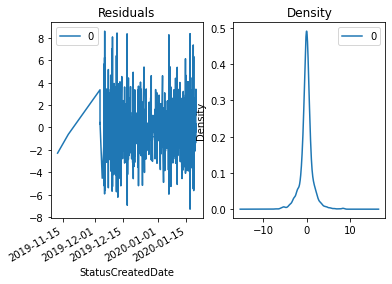

In [89]:
#Fitting model
from statsmodels.tsa.arima.model import ARIMA
# 2,1,3 ARIMA Model
model = ARIMA(train, order=(2,0,1)) ### TEST q=1
model_fit = model.fit()
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


In [91]:
start = len(train)

end = len(train)+len(test)-1

pred = model_fit.predict(start=start, end=end, typ='levels')
print(pred)
print(train)
pred.index=dfs.index[start:end+1]



2957    6.588095
2958    5.512646
2959    4.713916
2960    4.136751
2961    3.732608
          ...   
4220    3.296229
4221    3.296229
4222    3.296229
4223    3.296229
4224    3.296229
Name: predicted_mean, Length: 1268, dtype: float64
StatusCreatedDate
2019-11-12 13:14:00    1
2019-11-17 20:09:00    1
2019-12-03 11:29:00    5
2019-12-03 11:29:00    5
2019-12-03 11:29:00    5
                      ..
2020-01-19 18:39:00    8
2020-01-19 18:39:00    8
2020-01-19 18:39:00    8
2020-01-19 18:39:00    8
2020-01-19 18:39:00    8
Name: GroupSize, Length: 2957, dtype: int64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [92]:
print(pred)

StatusCreatedDate
2020-01-19 18:39:00    6.588095
2020-01-19 18:41:00    5.512646
2020-01-19 18:41:00    4.713916
2020-01-19 18:41:00    4.136751
2020-01-19 18:41:00    3.732608
                         ...   
2020-02-17 08:36:00    3.296229
2020-02-17 08:36:00    3.296229
2020-02-17 08:39:00    3.296229
2020-02-17 08:39:00    3.296229
2020-02-17 10:34:00    3.296229
Name: predicted_mean, Length: 1268, dtype: float64


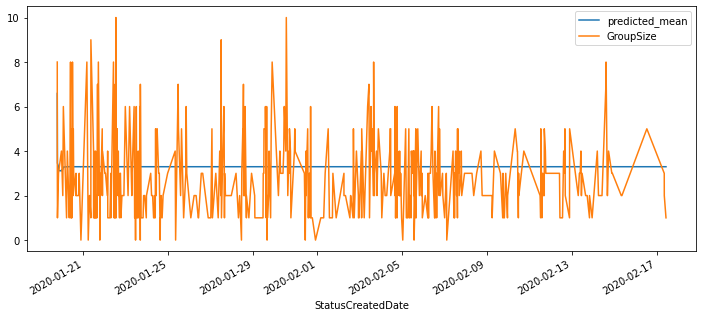

In [93]:
pred.plot(legend=True, figsize=(12,5))

test.plot(legend=True, figsize=(12,5))

In [94]:
# pd.concat([dfs['GroupSize'],pred], axis=1).plot()
from sklearn.metrics import mean_absolute_error,mean_squared_error
rf_mea = mean_absolute_error(test, pred)
print("MAE: ", rf_mea)

MAE:  1.5008733395835616


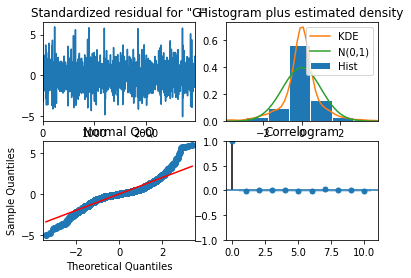

In [95]:
from statsmodels.tsa.arima_model import ARIMA
model_fit.plot_diagnostics()
# model_fit.plot_predict(dynamic=False)
plt.show()

## Using Xgboost

In [96]:
dfs.tail(1200)

,StartDate,EventName,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,ClientId,time_to_event,days_to_event,cum_booking
StatusCreatedDate,,,,,,,,,,,,,,,
2020-01-20 15:41:00,2022-03-03,6,B806273,A872679,2,1,0,19934,0,4,8,249,772 days 08:19:00,772.346528,10026
2020-01-20 15:48:00,2022-03-03,6,B806278,A872687,3,0,50,19934,0,5,21,249,772 days 08:12:00,772.341667,10029
2020-01-20 15:48:00,2022-03-03,6,B806278,A872685,3,1,0,19934,0,4,22,249,772 days 08:12:00,772.341667,10032
2020-01-20 15:48:00,2022-03-03,6,B806278,A872686,3,0,50,19934,0,5,21,249,772 days 08:12:00,772.341667,10035
2020-01-20 16:03:00,2022-03-03,6,B806287,A872697,2,0,50,19934,0,5,21,249,772 days 07:57:00,772.331250,10037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-17 08:36:00,2022-03-03,6,B820837,A888322,3,0,50,19934,0,5,20,249,744 days 15:24:00,744.641667,14122
2020-02-17 08:36:00,2022-03-03,6,B820837,A888323,3,0,50,19934,0,5,20,249,744 days 15:24:00,744.641667,14125
2020-02-17 08:39:00,2022-03-03,6,B820839,A888325,2,1,0,19934,0,4,8,249,744 days 15:21:00,744.639583,14127


In [97]:
# # dfs.index = pd.to_datetime(dfs.index)
# # train = dfs.loc[dfs.index < '2020-01-20 15:41:00']
# # test = dfs.loc[dfs.index >= '2020-01-20 15:41:00']

# fig, ax = plt.subplots(figsize=(15, 5))
# train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
# test.plot(ax=ax, label='Test Set')
# # ax.axvline('2020-01-20 15:41:00', color='black', ls='--')
# ax.legend(['Training Set', 'Test Set'])
# # plt.show()

In [98]:
def create_features(dfs):
    """
    Create time series features based on time series index.
    """
    dfs = dfs.copy()
    dfs['hour'] = dfs.index.hour
    dfs['dayofweek'] = dfs.index.dayofweek
    dfs['quarter'] = dfs.index.quarter
    dfs['month'] = dfs.index.month
    dfs['year'] = dfs.index.year
    dfs['dayofyear'] = dfs.index.dayofyear
    dfs['dayofmonth'] = dfs.index.day
    dfs['weekofyear'] = dfs.index.isocalendar().week
    return dfs

dfs = create_features(dfs)

In [99]:
dfs

,StartDate,EventName,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,...,days_to_event,cum_booking,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
StatusCreatedDate,,,,,,,,,,,,,,,,,,,,,
2019-11-12 13:14:00,2019-12-19 09:30:00,2,B787286,A851402,1,1,995,21413,0,2,...,7.844444,1,13,1,4,11,2019,316,12,46
2019-11-17 20:09:00,2019-12-19 09:30:00,2,B790602,A854870,1,1,995,21413,0,2,...,31.556250,2,20,6,4,11,2019,321,17,46
2019-12-03 11:29:00,2022-03-03 00:00:00,6,B795637,A860012,5,0,50,19934,0,5,...,1086.521528,7,11,1,4,12,2019,337,3,49
2019-12-03 11:29:00,2022-03-03 00:00:00,6,B795637,A860010,5,0,50,19934,0,5,...,1086.521528,12,11,1,4,12,2019,337,3,49
2019-12-03 11:29:00,2022-03-03 00:00:00,6,B795637,A860009,5,0,50,19934,0,5,...,1086.521528,17,11,1,4,12,2019,337,3,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-17 08:36:00,2022-03-03 00:00:00,6,B820837,A888322,3,0,50,19934,0,5,...,744.641667,14122,8,0,1,2,2020,48,17,8
2020-02-17 08:36:00,2022-03-03 00:00:00,6,B820837,A888323,3,0,50,19934,0,5,...,744.641667,14125,8,0,1,2,2020,48,17,8
2020-02-17 08:39:00,2022-03-03 00:00:00,6,B820839,A888325,2,1,0,19934,0,4,...,744.639583,14127,8,0,1,2,2020,48,17,8


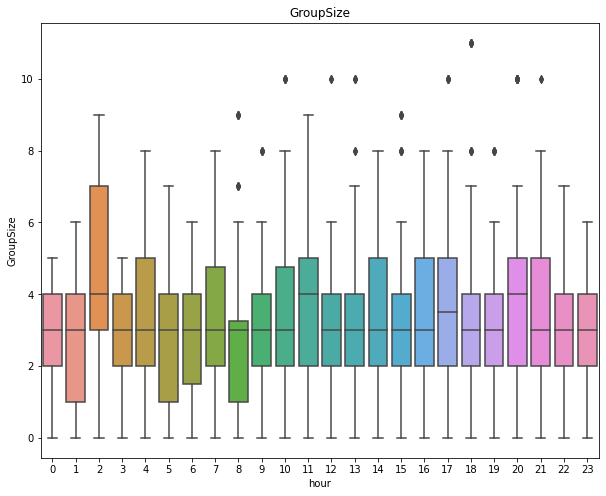

In [100]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=dfs, x='hour', y='GroupSize')
ax.set_title('GroupSize')
plt.show()

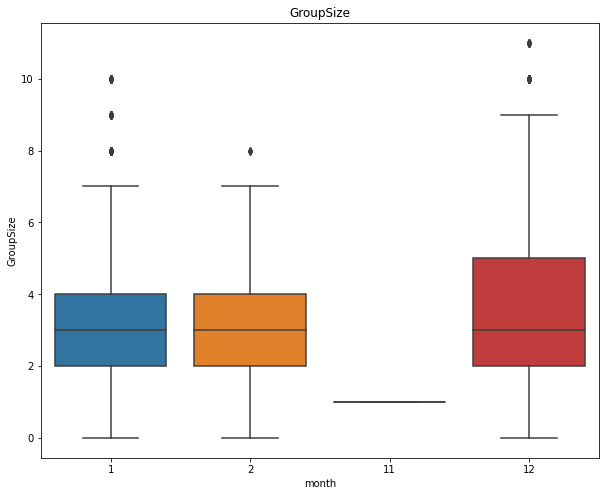

In [101]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=dfs, x='month', y='GroupSize')
ax.set_title('GroupSize')
plt.show()

### Create our Model

In [102]:
dfs.columns
df.head(2)

,EventName,StartDate,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
0,University of London International Programmes ...,06/03/2018 00:00,B452158,A502856,2,True,27,12445,Attending,Graduand,PM Ceremony,26/10/2017 10:12,249
1,University of London International Programmes ...,06/03/2018 00:00,B452158,A502857,2,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:12,249


In [112]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dfs, test_size=.3, shuffle=False)

In [113]:
train = create_features(train)
test = create_features(test)

FEATURES = ['BookingStatus','AttendeeType','EventName','dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'GroupSize'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [114]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [115]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[11:48:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.4803	validation_1-rmse:3.50228
[100]	validation_0-rmse:2.05997	validation_1-rmse:1.9687
[200]	validation_0-rmse:1.77802	validation_1-rmse:1.705
[300]	validation_0-rmse:1.71265	validation_1-rmse:1.68235
[400]	validation_0-rmse:1.68202	validation_1-rmse:1.68256
[500]	validation_0-rmse:1.66297	validation_1-rmse:1.67874
[600]	validation_0-rmse:1.64908	validation_1-rmse:1.67963
[700]	validation_0-rmse:1.63759	validation_1-rmse:1.68476
[800]	validation_0-rmse:1.6268	validation_1-rmse:1.69063
[900]	validation_0-rmse:1.61738	validation_1-rmse:1.69372
[999]	validation_0-rmse:1.60647	validation_1-rmse:1.69877


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01, n_estimators=1000)

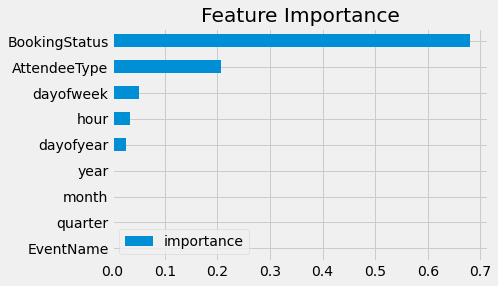

In [116]:
fi = pd.DataFrame(data=reg.feature_importances_, index= reg.get_booster().feature_names,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [117]:
# plt.figure(figsize=(20,10))
# sns.heatmap(dfs.corr(), annot = True)

### forecast

In [118]:
test

,StartDate,EventName,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,...,days_to_event,cum_booking,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
StatusCreatedDate,,,,,,,,,,,,,,,,,,,,,
2020-01-19 18:39:00,2022-03-03,6,B805950,A872304,8,0,50,19934,0,5,...,773.222917,9753,18,6,1,1,2020,19,19,3
2020-01-19 18:41:00,2022-03-03,6,B805953,A872311,4,0,50,19934,0,5,...,773.221528,9757,18,6,1,1,2020,19,19,3
2020-01-19 18:41:00,2022-03-03,6,B805953,A872310,4,0,50,19934,0,5,...,773.221528,9761,18,6,1,1,2020,19,19,3
2020-01-19 18:41:00,2022-03-03,6,B805953,A872309,4,0,50,19934,0,5,...,773.221528,9765,18,6,1,1,2020,19,19,3
2020-01-19 18:41:00,2022-03-03,6,B805953,A872308,4,1,0,19934,0,4,...,773.221528,9769,18,6,1,1,2020,19,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-17 08:36:00,2022-03-03,6,B820837,A888322,3,0,50,19934,0,5,...,744.641667,14122,8,0,1,2,2020,48,17,8
2020-02-17 08:36:00,2022-03-03,6,B820837,A888323,3,0,50,19934,0,5,...,744.641667,14125,8,0,1,2,2020,48,17,8
2020-02-17 08:39:00,2022-03-03,6,B820839,A888325,2,1,0,19934,0,4,...,744.639583,14127,8,0,1,2,2020,48,17,8


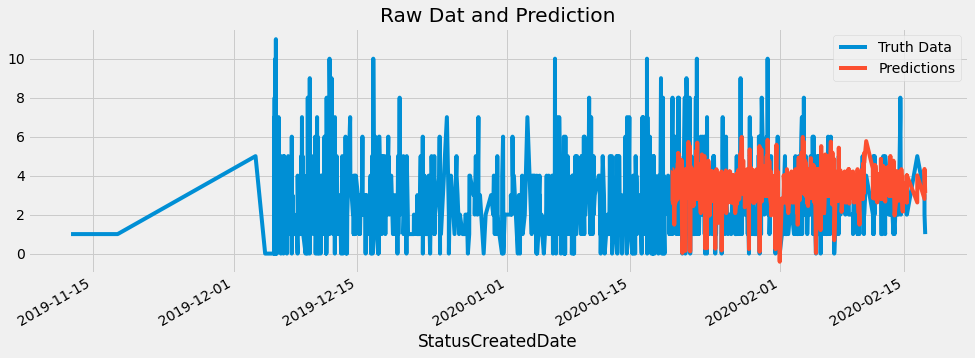

In [119]:
test['prediction'] = reg.predict(X_test)
dfs = dfs.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = dfs[['GroupSize']].plot(figsize=(15, 5))
test['prediction'].plot(legend=True)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [120]:
score = np.sqrt(mean_squared_error(test['GroupSize'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 1.70


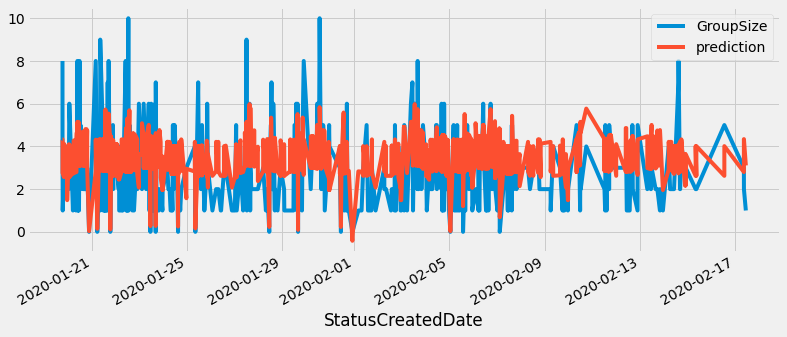

In [121]:
test['GroupSize'].plot(legend=True, figsize=(12,5))
test['prediction'].plot(legend=True, figsize=(12,5))
# style='.'
# test['GroupSize'].plot(legend=True, figsize=(12,5))

#### normaize data

In [122]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(X_train)
print(X_test)

[[-2.86979524e-01 -5.05921114e+00 -3.84382622e+01 ...  8.56919396e-01
   6.73117895e-01 -8.56919396e-01]
 [-2.86979524e-01 -5.05921114e+00 -3.84382622e+01 ...  8.56919396e-01
   6.73117895e-01 -8.56919396e-01]
 [-2.86979524e-01  7.80770905e-01  2.60157443e-02 ...  8.56919396e-01
   8.57125440e-01 -8.56919396e-01]
 ...
 [-2.86979524e-01  7.80770905e-01  2.60157443e-02 ... -1.16697090e+00
  -1.16695756e+00  1.16697090e+00]
 [-2.86979524e-01  7.80770905e-01  2.60157443e-02 ... -1.16697090e+00
  -1.16695756e+00  1.16697090e+00]
 [-2.86979524e-01 -1.16588977e+00  2.60157443e-02 ... -1.16697090e+00
  -1.16695756e+00  1.16697090e+00]]
[[-0.28697952  0.78077091  0.02601574 ... -1.1669709  -1.16695756
   1.1669709 ]
 [-0.28697952  0.78077091  0.02601574 ... -1.1669709  -1.16695756
   1.1669709 ]
 [-0.28697952  0.78077091  0.02601574 ... -1.1669709  -1.16695756
   1.1669709 ]
 ...
 [-0.28697952 -1.16588977  0.02601574 ... -1.1669709  -0.98295001
   1.1669709 ]
 [-0.28697952  0.78077091  0.026015

In [123]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[11:50:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.4803	validation_1-rmse:3.50228
[100]	validation_0-rmse:2.05997	validation_1-rmse:1.9687
[200]	validation_0-rmse:1.77802	validation_1-rmse:1.705
[300]	validation_0-rmse:1.71265	validation_1-rmse:1.68235
[400]	validation_0-rmse:1.68202	validation_1-rmse:1.68256
[500]	validation_0-rmse:1.66297	validation_1-rmse:1.67874
[600]	validation_0-rmse:1.64908	validation_1-rmse:1.67963
[700]	validation_0-rmse:1.63759	validation_1-rmse:1.68476
[800]	validation_0-rmse:1.6268	validation_1-rmse:1.69063
[900]	validation_0-rmse:1.61738	validation_1-rmse:1.69393
[999]	validation_0-rmse:1.60647	validation_1-rmse:1.69925


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01, n_estimators=1000)

In [ ]:
test['prediction'] = reg.predict(X_test)
# dfs = dfs.merge(test[['prediction']], how='left', left_index=True, right_index=True)
# ax = dfs[['GroupSize']].plot(figsize=(15, 5))
# test['prediction'].plot(legend=True)
# plt.legend(['Truth Data', 'Predictions'])
# ax.set_title('Raw Dat and Prediction')
# plt.show()

In [ ]:
test['GroupSize'].plot(legend=True, figsize=(12,5))
test['prediction'].plot(legend=True, figsize=(12,5))

In [ ]:
score = np.sqrt(mean_squared_error(test['GroupSize'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

## Feature selection